# ESA 10 - Aaliyah Roderer

### Objective:
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.  Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/osual/OneDrive/Dokumente/Master/Data_Science/ESA10/country.txt')

df.info()
print(50*'-')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB
--------------------------------------------------


In [27]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.905960,40.447013,6.790530,46.351430,17899.423841,7.857536,70.774172,2.934305,13636.324503
std,40.749021,28.196914,2.781353,24.614163,19801.730058,10.973978,9.011529,1.512132,18766.269648
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.850000,22.800000,4.850000,29.950000,3850.000000,1.730000,65.450000,1.820000,1485.000000
50%,19.100000,34.800000,6.220000,43.000000,10400.000000,5.140000,73.400000,2.410000,5020.000000
75%,60.400000,50.950000,8.690000,57.500000,26200.000000,10.350000,77.000000,3.750000,16850.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [28]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [29]:
df['country'].nunique()

151

# Task:

## 1. use K-means clustering and Hierarchical clustering to cluster the country into groups. please choose the number of the cluster in a rational reason

C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

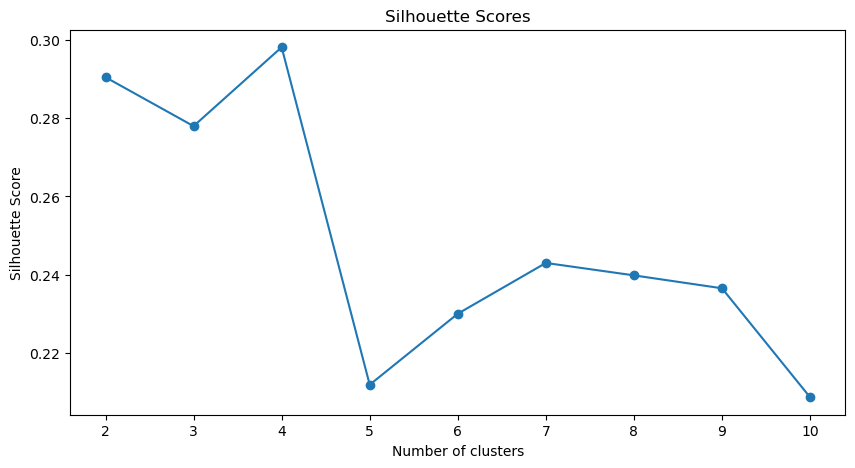

C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


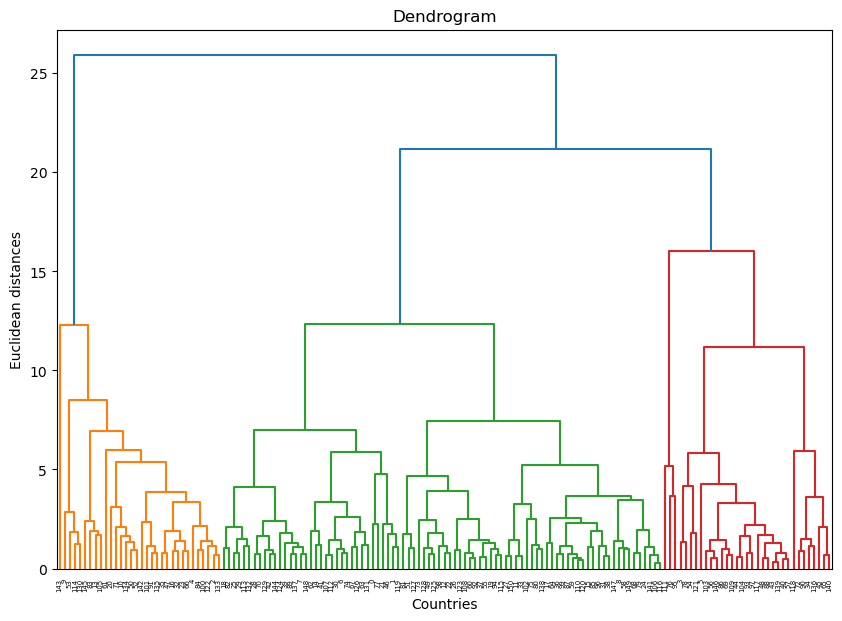

C:\Users\osual\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

os.environ['OMP_NUM_THREADS'] = '1'

df_clustering = df.drop('country', axis=1)

scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Silhouette-Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(df_clustering_scaled)
    silhouette_avg = silhouette_score(df_clustering_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_clusters = 4

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_clustering_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_clustering_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

Die Anzahl der CLuster wurde basierend auf der Ausgabe des Sillhoutte Score gewähl und durch ausprobieren in der Visualisierung optimiert. Persönlich hatte ich das Gefühl, dass 4 Cluster den meisten Sinn machen, auch wenn die Elbow Methode beispielsweise eher auf 3 Cluster hingedeutet hat.

## 2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

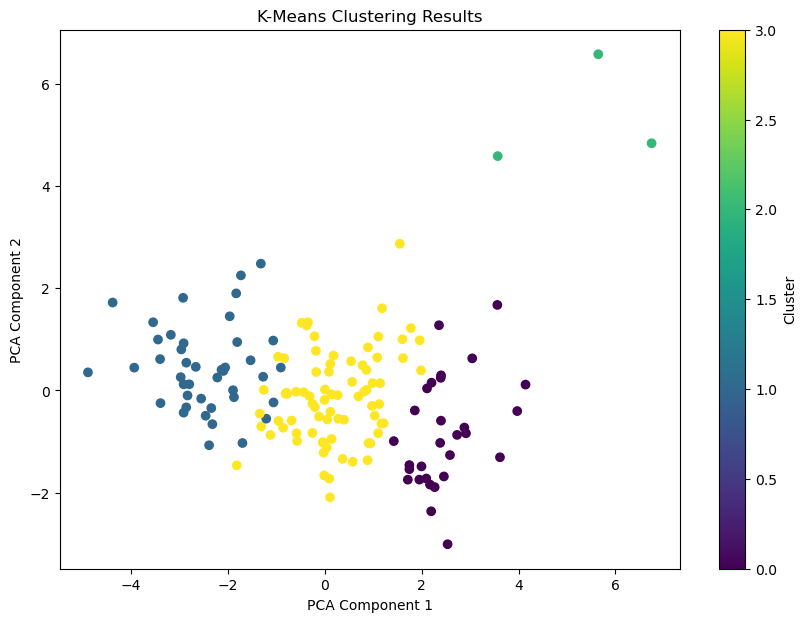

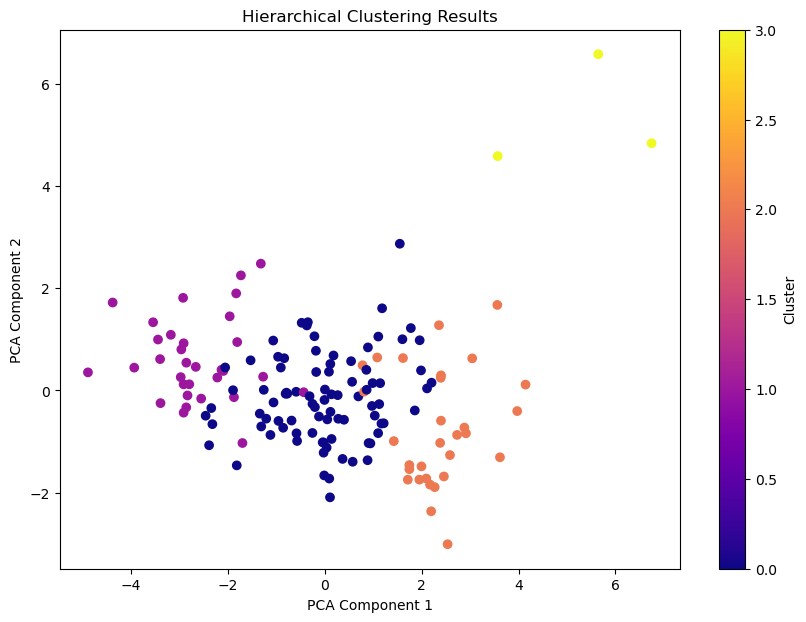

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', label='KMeans Clusters')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_labels, cmap='plasma', label='Hierarchical Clusters')
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## 3. please write the suggestion to CEO about the country you suggest

Hier sind die Empfehlungen für die Verwendung der von HELP International gesammelten 10 Millionen Dollar:

Cluster 0: Dieser Cluster repräsentiert wahrscheinlich die Länder mit den größten sozioökonomischen und gesundheitlichen Problemen. Sie haben eine hohe Kindersterblichkeitsrate, eine niedrige Lebenserwartung und ein niedriges Pro-Kopf-BIP. Ein erheblicher Teil der Mittel sollte hier zur Deckung der grundlegenden Bedürfnisse in den Bereichen Gesundheit, Bildung und Infrastruktur eingesetzt werden.

Cluster 1: Die Länder in diesem Cluster stehen möglicherweise vor mäßigen Herausforderungen. Sie könnten von gezielten Maßnahmen wie der Verbesserung von Gesundheitseinrichtungen, der Verbesserung von Bildungsmöglichkeiten und der Unterstützung von Kleinunternehmen zur Förderung des Wirtschaftswachstums profitieren.

Cluster 2: Diese Länder befinden sich wahrscheinlich auf einem positiven Entwicklungspfad, haben aber immer noch verbesserungsbedürftige Bereiche. Hier könnten sich die Investitionen auf die Förderung der Technologie, die Verbesserung der Hochschulbildung und die Förderung von Innovationen zur Unterstützung des Wachstums konzentrieren.

Cluster 3: Die Länder in diesem Cluster dürften relativ wohlhabend sein und über bessere sozioökonomische Indikatoren verfügen. Hier könnten die Mittel zur Unterstützung von Forschung und Entwicklung, zur Förderung der ökologischen Nachhaltigkeit und zur Förderung globaler Partnerschaften eingesetzt werden.

Im Allgemeinen lässt sich also festhalten, dass die vorhandenen Gelder vor allem Dingen für Cluster 0 und 1 aufgewendet werden sollten, da es hier die größten Defizite zu vermerken gibt,

## Weitere eigene Ansichten und Tests

In [ ]:
cluster0=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
cluster1=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
cluster2=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']
cluster3=kmeans_df[kmeans_df['KMeans_Clusters']==3]['country']


print("Number of countries in cluster 0",len(cluster0))
print("Number of countries in cluster 1",len(cluster1))
print("Number of countries in cluster 2",len(cluster2))
print("Number of countries in cluster 3",len(cluster3))

In [60]:
def save_cluster_tables(df, cluster_col, method_name):
    unique_clusters = df[cluster_col].unique()
    for cluster in unique_clusters:
        cluster_data = df[df[cluster_col] == cluster]
        cluster_data.to_csv(f'{method_name}_Cluster_{cluster}.csv', index=False)
        print(f'Data for {method_name} Cluster {cluster} saved to {method_name}_Cluster_{cluster}.csv')

save_cluster_tables(df, 'KMeans_Cluster', 'KMeans')

save_cluster_tables(df, 'Hierarchical_Cluster', 'Hierarchical')

Data for KMeans Cluster 2 saved to KMeans_Cluster_2.csv
Data for Hierarchical Cluster 3 saved to Hierarchical_Cluster_3.csv


In [36]:
import pandas as pd
import os

directory = '.'  

csv_files = [
    'KMeans_Cluster_3.csv',
    'KMeans_Cluster_1.csv',
    'KMeans_Cluster_0.csv',
    'KMeans_Cluster_2.csv',
    'Hierarchical_Cluster_0.csv',
    'Hierarchical_Cluster_1.csv',
    'Hierarchical_Cluster_2.csv',
    'Hierarchical_Cluster_3.csv'
]

for file_name in csv_files:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        print(f'Data for {file_name}:')
        df = pd.read_csv(file_path)
        print(df)
        print('---' * 10) 
    else:
        print(f'File {file_name} does not exist.')


Data for KMeans_Cluster_3.csv:
               country  child_mort  exports  health  imports  income  \
0             Mongolia        26.1     46.7    5.44     56.7    7710   
1              Bolivia        46.6     41.2    4.84     34.3    5410   
2               Turkey        19.1     20.4    6.74     25.5   18000   
3              Georgia        16.5     35.0   10.10     52.8    6730   
4      Slovak Republic         7.0     76.3    8.79     77.8   25200   
..                 ...         ...      ...     ...      ...     ...   
72  Dominican Republic        34.4     22.7    6.22     33.3   11100   
73          Costa Rica        10.2     33.2   10.90     35.0   13000   
74            Colombia        18.6     15.9    7.59     17.8   10900   
75          Montenegro         6.8     37.0    9.11     62.7   14000   
76      Czech Republic         3.4     66.0    7.88     62.9   28300   

    inflation  life_expec  total_fer   gdpp  KMeans_Cluster  \
0      39.200        66.2       2.64   26

In [42]:
import pandas as pd
import os

directory = '.'  # Aktuelles Verzeichnis

csv_files = [
    'KMeans_Cluster_3.csv',
    'KMeans_Cluster_1.csv',
    'KMeans_Cluster_0.csv',
    'KMeans_Cluster_2.csv',
    'Hierarchical_Cluster_0.csv',
    'Hierarchical_Cluster_1.csv',
    'Hierarchical_Cluster_2.csv',
    'Hierarchical_Cluster_3.csv'
]

for file_name in csv_files:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        variable_name = os.path.splitext(file_name)[0]
        df = pd.read_csv(file_path)
        globals()[variable_name] = df
        print(f'Data for {file_name} loaded into variable {variable_name}')
        print(df)
        print('---' * 10)
    else:
        print(f'File {file_name} does not exist.')

Data for KMeans_Cluster_3.csv loaded into variable KMeans_Cluster_3
               country  child_mort  exports  health  imports  income  \
0             Mongolia        26.1     46.7    5.44     56.7    7710   
1              Bolivia        46.6     41.2    4.84     34.3    5410   
2               Turkey        19.1     20.4    6.74     25.5   18000   
3              Georgia        16.5     35.0   10.10     52.8    6730   
4      Slovak Republic         7.0     76.3    8.79     77.8   25200   
..                 ...         ...      ...     ...      ...     ...   
72  Dominican Republic        34.4     22.7    6.22     33.3   11100   
73          Costa Rica        10.2     33.2   10.90     35.0   13000   
74            Colombia        18.6     15.9    7.59     17.8   10900   
75          Montenegro         6.8     37.0    9.11     62.7   14000   
76      Czech Republic         3.4     66.0    7.88     62.9   28300   

    inflation  life_expec  total_fer   gdpp  KMeans_Cluster  \
0   

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,21.375325,40.249208,6.109351,46.763194,13458.831169,7.332091,73.116883,2.294026,7251.506494,3.0,0.116883
std,14.042718,19.661228,2.117537,19.853504,9023.477270,8.084257,3.797312,0.670110,5565.735447,0.0,0.458086
min,3.400000,0.109000,1.970000,0.065900,1990.000000,-4.210000,63.000000,1.250000,592.000000,3.0,0.000000
25%,10.800000,26.300000,4.840000,32.400000,7290.000000,1.740000,70.400000,1.760000,3040.000000,3.0,0.000000
50%,18.100000,37.000000,5.880000,48.700000,10900.000000,5.710000,74.000000,2.200000,5080.000000,3.0,0.000000
75%,26.500000,51.400000,7.460000,60.200000,18000.000000,8.980000,76.100000,2.650000,10700.000000,3.0,0.000000
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,3.0,2.000000


In [44]:
KMeans_Cluster_0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.000000
mean,4.968966,44.924138,9.074483,38.913793,45241.379310,2.807517,80.365517,1.795517,43093.103448,0.0,1.793103
std,2.195629,21.541333,3.282394,17.161704,20135.461207,4.326590,1.464405,0.375828,15247.644573,0.0,0.619868
min,2.600000,12.400000,1.810000,13.600000,27200.000000,-3.220000,76.500000,1.230000,22100.000000,0.0,0.000000
25%,3.800000,28.200000,8.730000,28.000000,33900.000000,0.643000,79.800000,1.460000,33700.000000,0.0,2.000000
50%,4.200000,42.300000,9.530000,32.900000,40400.000000,1.220000,80.400000,1.870000,41800.000000,0.0,2.000000
75%,5.200000,62.300000,11.000000,46.200000,45700.000000,3.220000,81.400000,1.980000,48400.000000,0.0,2.000000
max,10.800000,103.000000,17.900000,86.500000,125000.000000,16.700000,82.800000,3.030000,87800.000000,0.0,2.000000


In [45]:
KMeans_Cluster_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.000000
mean,93.366667,28.035952,6.462143,42.852381,3866.261905,12.692738,59.095238,5.005476,1864.738095,1.0,0.738095
std,34.510116,18.215938,2.767271,18.154530,5661.590602,16.180148,6.739652,1.084155,2921.745110,0.0,0.445001
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0,0.000000
25%,63.675000,16.575000,4.515000,30.225000,1390.000000,4.187500,56.575000,4.522500,548.500000,1.0,0.250000
50%,89.750000,23.300000,5.455000,40.950000,1860.000000,9.225000,59.800000,5.080000,833.000000,1.0,1.000000
75%,111.000000,36.450000,8.382500,49.525000,3827.500000,16.600000,62.650000,5.672500,1475.000000,1.0,1.000000
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0,1.000000


In [46]:
KMeans_Cluster_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.0,3.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,2.0,3.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,2.0,3.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,2.0,3.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,2.0,3.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,2.0,3.0


In [47]:
KMeans_Cluster_3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,21.375325,40.249208,6.109351,46.763194,13458.831169,7.332091,73.116883,2.294026,7251.506494,3.0,0.116883
std,14.042718,19.661228,2.117537,19.853504,9023.477270,8.084257,3.797312,0.670110,5565.735447,0.0,0.458086
min,3.400000,0.109000,1.970000,0.065900,1990.000000,-4.210000,63.000000,1.250000,592.000000,3.0,0.000000
25%,10.800000,26.300000,4.840000,32.400000,7290.000000,1.740000,70.400000,1.760000,3040.000000,3.0,0.000000
50%,18.100000,37.000000,5.880000,48.700000,10900.000000,5.710000,74.000000,2.200000,5080.000000,3.0,0.000000
75%,26.500000,51.400000,7.460000,60.200000,18000.000000,8.980000,76.100000,2.650000,10700.000000,3.0,0.000000
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,3.0,2.000000


In [48]:
Hierarchical_Cluster_0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,26.276744,38.182314,6.165349,45.464720,12017.325581,7.720279,72.045349,2.468140,6908.000000,2.639535,0.0
std,20.274369,19.266041,1.955675,19.463048,7322.477952,8.296050,5.290339,0.965625,6056.179669,0.838946,0.0
min,3.200000,0.109000,1.970000,0.065900,1420.000000,-4.210000,54.300000,1.230000,482.000000,0.000000,0.0
25%,10.900000,25.925000,4.950000,28.325000,6505.000000,2.017500,69.125000,1.730000,2970.000000,3.000000,0.0
50%,19.150000,35.200000,6.015000,47.600000,9950.000000,5.860000,73.350000,2.300000,4670.000000,3.000000,0.0
75%,35.150000,50.200000,7.687500,58.825000,16450.000000,9.952500,76.225000,2.725000,9070.000000,3.000000,0.0
max,92.100000,93.800000,11.100000,108.000000,33900.000000,45.900000,80.400000,6.230000,30800.000000,3.000000,0.0


In [49]:
Hierarchical_Cluster_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.0
mean,102.056250,28.328750,6.812812,46.562500,3025.718750,11.983281,57.884375,5.262500,1484.28125,1.062500,1.0
std,34.462686,19.101822,3.160411,19.578885,5753.174087,18.187490,6.764571,0.964475,2962.24831,0.353553,0.0
min,40.000000,8.920000,2.460000,17.400000,609.000000,0.885000,32.100000,3.300000,231.00000,1.000000,1.0
25%,80.825000,16.725000,4.525000,34.275000,1212.500000,3.592500,56.050000,4.900000,455.75000,1.000000,1.0
50%,98.550000,22.800000,5.450000,42.950000,1635.000000,7.015000,59.050000,5.260000,682.00000,1.000000,1.0
75%,116.750000,32.825000,8.627500,52.450000,2525.000000,14.525000,60.825000,5.825000,1227.50000,1.000000,1.0
max,208.000000,85.800000,14.200000,101.000000,33700.000000,104.000000,68.200000,7.490000,17100.00000,3.000000,1.0


In [50]:
Hierarchical_Cluster_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,6.193333,46.31000,8.558667,37.636667,46013.333333,4.389167,79.813333,1.942667,41493.333333,0.400000,2.0
std,3.682103,21.96931,3.647442,15.993414,19452.572445,5.741487,2.141822,0.450287,16658.391969,1.037238,0.0
min,2.600000,12.40000,1.810000,13.600000,27200.000000,-3.220000,75.100000,1.370000,12100.000000,0.000000,2.0
25%,3.925000,28.42500,5.635000,28.025000,36200.000000,0.694250,78.900000,1.547500,31450.000000,0.000000,2.0
50%,4.500000,44.25000,9.510000,32.950000,41100.000000,1.670000,80.350000,1.925000,41200.000000,0.000000,2.0
75%,8.275000,65.20000,10.925000,43.000000,45625.000000,6.722500,81.400000,2.137500,48150.000000,0.000000,2.0
max,16.600000,103.00000,17.900000,86.500000,125000.000000,17.200000,82.800000,3.030000,87800.000000,3.000000,2.0


In [51]:
Hierarchical_Cluster_3.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.0,3.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,2.0,3.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,2.0,3.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,2.0,3.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,2.0,3.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,2.0,3.0
